In [1]:
import pandas as pd
from datetime import *
import json
import yfinance

df = pd.read_csv('spx2020.csv')
df = df.drop(columns=['Unnamed: 0'])
df['# of earnings'] = -1
df['% of positive impact of earnings'] = -1.0
df['# of positive surprise earnings'] = -1
df['% of positive impact of earnings when positive surprise'] = -1.0
df['# of negative surprise earnings'] = -1
df['% of positive impact of earnings when negative surprise'] = -1.0
df

,ticker,company,# of earnings,% of positive impact of earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise
0,VIAC,VIACOMCBS INC,-1,-1.0,-1,-1.0,-1,-1.0
1,SCHW,SCHWAB CHARLES CORP NEW,-1,-1.0,-1,-1.0,-1,-1.0
2,CSCO,CISCO SYSTEMS INC,-1,-1.0,-1,-1.0,-1,-1.0
3,HD,HOME DEPOT INC,-1,-1.0,-1,-1.0,-1,-1.0
4,QCOM,QUALCOMM INC,-1,-1.0,-1,-1.0,-1,-1.0
...,...,...,...,...,...,...,...,...
499,FOX,FOX CORP,-1,-1.0,-1,-1.0,-1,-1.0
500,GOOG,GOOGLE INC,-1,-1.0,-1,-1.0,-1,-1.0
501,GOOGL,GOOGLE INC,-1,-1.0,-1,-1.0,-1,-1.0
502,UA,UNDER ARMOUR INC,-1,-1.0,-1,-1.0,-1,-1.0


In [2]:
for i in range(len(df)):
    stock_abbr = df.iloc[i, 0]
    print(stock_abbr)
    !node get_earnings2.js {stock_abbr}
    f = open(f'{stock_abbr}.json')
    earnings = json.load(f)
    f.close()
    !rm {stock_abbr}.json

    start, end = '1995-01-01', '2022-12-31'
    stock_ticker = yfinance.Ticker(stock_abbr)
    stock = stock_ticker.history(start=start, end=end)
    stock['Close_t+1'] = stock.Close.shift(-1)

    count, count_up = 0, 0
    count_pos, count_pos_up = 0, 0
    count_neg, count_neg_up = 0, 0
    for j in range(len(earnings)):
        if earnings[j]['eps'] and earnings[j]['date'] in stock.index:
            count += 1
            if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                count_up += 1
            if earnings[j]['estimated_eps']:
                if earnings[j]['estimated_eps'] < earnings[j]['eps']:
                    count_pos += 1
                    if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                        count_pos_up += 1
                elif earnings[j]['estimated_eps'] > earnings[j]['eps']:
                    count_neg += 1
                    if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                        count_neg_up += 1
    pos_impact = count_up / count if count > 0 else -1
    pos_pos_impact = count_pos_up / count_pos if count_pos > 0 else -1
    neg_pos_impact = count_neg_up / count_neg if count_neg > 0 else -1
    df.at[i, '# of earnings'] = count
    df.at[i, '% of positive impact of earnings'] = pos_impact
    df.at[i, '# of positive surprise earnings'] = count_pos
    df.at[i, '% of positive impact of earnings when positive surprise'] = pos_pos_impact
    df.at[i, '# of negative surprise earnings'] = count_neg
    df.at[i, '% of positive impact of earnings when negative surprise'] = neg_pos_impact
    print(f'earnings count: {count}')
    print(f'positive impact: {pos_impact}')
    print(f'positive surprise count: {count_pos}')
    print(f'positive impact on positive surprise: {pos_pos_impact}')
    print(f'negative surprise count: {count_neg}')
    print(f'positive impact on negative surprise: {neg_pos_impact}\n')

VIAC
- VIAC: No data found, symbol may be delisted
earnings count: 0
positive impact: -1
positive surprise count: 0
positive impact on positive surprise: -1
negative surprise count: 0
positive impact on negative surprise: -1

SCHW
earnings count: 112
positive impact: 0.5089285714285714
positive surprise count: 45
positive impact on positive surprise: 0.5333333333333333
negative surprise count: 19
positive impact on negative surprise: 0.2631578947368421

CSCO
earnings count: 112
positive impact: 0.5178571428571429
positive surprise count: 92
positive impact on positive surprise: 0.532608695652174
negative surprise count: 1
positive impact on negative surprise: 0.0

HD
earnings count: 112
positive impact: 0.4642857142857143
positive surprise count: 80
positive impact on positive surprise: 0.4375
negative surprise count: 9
positive impact on negative surprise: 0.6666666666666666

QCOM
earnings count: 110
positive impact: 0.5
positive surprise count: 76
positive impact on positive surprise

In [23]:
df = df[df['% of positive impact of earnings'] != -1]
df = df.reset_index(drop=True)
df.to_csv('earnings_impact2.csv', index=False)
df

,ticker,company,# of earnings,% of positive impact of earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise
0,SCHW,SCHWAB CHARLES CORP NEW,112,0.508929,45,0.533333,19,0.263158
1,CSCO,CISCO SYSTEMS INC,112,0.517857,92,0.532609,1,0.000000
2,HD,HOME DEPOT INC,112,0.464286,80,0.437500,9,0.666667
3,QCOM,QUALCOMM INC,110,0.500000,76,0.500000,9,0.555556
4,AES,A E S CORP,111,0.549550,60,0.550000,30,0.533333
...,...,...,...,...,...,...,...,...
393,TSLA,TESLA INC,49,0.489796,23,0.608696,15,0.333333
394,GOOG,GOOGLE INC,33,0.575758,20,0.700000,10,0.300000
395,GOOGL,GOOGLE INC,73,0.589041,41,0.756098,19,0.368421
396,UA,UNDER ARMOUR INC,25,0.400000,14,0.500000,3,0.333333


In [7]:
fdf = df[df['# of earnings'] > 0]
print(f"% of scraping success: {len(fdf) / len(df)}")
print(f"average % of positive impact of earnings: {fdf['% of positive impact of earnings'].mean()}")
pfdf = fdf[fdf['# of positive surprise earnings'] != 0]
print(f"average % of positive impact of earnings when positive surprise: {pfdf['% of positive impact of earnings when positive surprise'].mean()}")
nfdf = fdf[fdf['# of negative surprise earnings'] != 0]
print(f"average % of positive impact of earnings when negative surprise: {nfdf['% of positive impact of earnings when negative surprise'].mean()}")

pnfdf = pfdf[pfdf['# of negative surprise earnings'] != 0]
pnfdf = pnfdf.reset_index()
count, count_pln = 0, 0
for i in range(len(pnfdf)):
    count += 1
    if pnfdf.at[i, '% of positive impact of earnings when positive surprise'] > pnfdf.at[i, '% of positive impact of earnings when negative surprise']:
        count_pln += 1
print(f"% of stocks which the average % of positive impact of earnings when positive surprise is bigger than when negative surprise: {count_pln / count}")

% of scraping success: 1.0
average % of positive impact of earnings: 0.5148021623111181
average % of positive impact of earnings when positive surprise: 0.5501103170828144
average % of positive impact of earnings when negative surprise: 0.42322341789750845
% of stocks which the average % of positive impact of earnings when positive surprise is bigger than when negative surprise: 0.7621483375959079


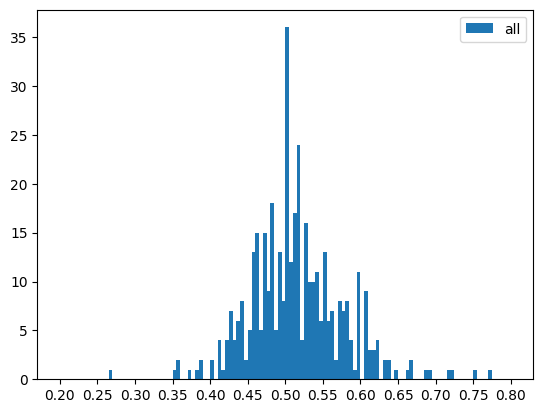

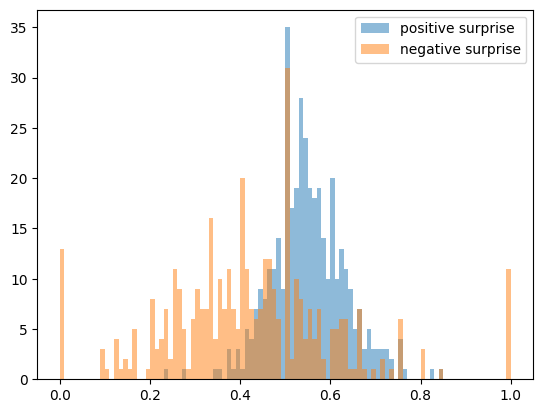

In [8]:
import matplotlib.pyplot as plt

plt.hist(fdf['% of positive impact of earnings'], 120, (0.2, 0.8), label='all')
plt.xticks([x / 100 for x in range(20,81,5)])
plt.legend(loc='upper right')
plt.show()
plt.hist(fdf['% of positive impact of earnings when positive surprise'], 100, (0, 1), alpha=0.5, label='positive surprise')
plt.hist(fdf['% of positive impact of earnings when negative surprise'], 100, (0, 1), alpha=0.5, label='negative surprise')
plt.legend(loc='upper right')
plt.show()

In [34]:
fdf = fdf.reset_index(drop=True)
correlated_goodness = [fdf.at[i, '% of positive impact of earnings'] if fdf.at[i, '% of positive impact of earnings'] >= 0.5 else 1 - fdf.at[i, '% of positive impact of earnings'] for i in range(len(fdf))]
fdf['correlated_goodness'] = correlated_goodness
sorted_fdf = fdf.sort_values(by=['correlated_goodness'], ascending=False)

In [37]:
sorted_fdf.iloc[:30,:].reset_index(drop=True)

,ticker,company,# of earnings,% of positive impact of earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise,correlated_goodness
0,NOW,SERVICENOW INC,40,0.775000,34,0.823529,2,1.000000,0.775000
1,AVGO,BROADCOM INC,53,0.754717,49,0.755102,1,1.000000,0.754717
2,DOW,DOW INC,15,0.266667,13,0.230769,0,-1.000000,0.733333
3,FANG,DIAMONDBACK ENERGY INC,40,0.725000,30,0.766667,9,0.555556,0.725000
4,MSCI,M S C I INC,60,0.716667,45,0.711111,7,0.714286,0.716667
5,MNST,MONSTER BEVERAGE CORP NEW,71,0.690141,33,0.848485,21,0.380952,0.690141
6,ANSS,ANSYS INC,105,0.685714,86,0.674419,1,1.000000,0.685714
7,VNT,VONTIER CORP,9,0.666667,8,0.625000,0,-1.000000,0.666667
8,ALLE,ALLEGION PLC,36,0.666667,24,0.708333,8,0.625000,0.666667
9,TMUS,T MOBILE U S INC,62,0.661290,42,0.690476,18,0.611111,0.661290


In [ ]:
sorted_fdf.to_csv("sorted_stocks_earnings_impact.csv", index=False)